In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_delays_and_profits(paths):
    output = None
    slave_ids = {}
    master_ids = {}
    for path in paths:
        master_profit = None
        master_orders = None
        delays = {}
        slave_ids[path] = []
        i = 0
        for file in os.listdir(path):
            if 'HerdMasterAgent' in file:
                try:
                    df = pd.read_pickle(os.path.join(path,file), compression='bz2')
                    master_profit = df.loc[df.EventType == 'ENDING_CASH', 'Event'].values[0] - df.loc[df.EventType == 'STARTING_CASH', 'Event'].values[0]
                    m_id = int(file.split('HerdMasterAgent')[1].split('.')[0])
                    master_ids[path] = m_id
                    master_orders = len(df[df.EventType == 'HOLDINGS_UPDATED']) - 1
                except (IndexError, KeyError):
                    continue                
            if 'HerdSlaveAgent' in file:
                try:
                    s_id = int(file.split('HerdSlaveAgent')[1].split('.')[0])
                    slave_ids[path].append(s_id)
                    df = pd.read_pickle(os.path.join(path,file), compression='bz2')
                    delay = df.loc[df.EventType == 'DELAY', 'Event'].values[0]
                    profit = df.loc[df.EventType == 'ENDING_CASH', 'Event'].values[0] - df.loc[df.EventType == 'STARTING_CASH', 'Event'].values[0]
                    executed_orders = len(df[df.EventType == 'HOLDINGS_UPDATED']) - 1
                    delays[i] = {'DELAY': delay, 'SLAVE_PROFIT': profit, 'SLAVE_ORDERS': executed_orders}
                    i += 1
                except (IndexError, KeyError):
                    continue
        temp = pd.DataFrame.from_dict(delays, orient='index')
        temp['MASTER_PROFIT'] = master_profit
        temp['MASTER_ORDERS'] = master_orders

        temp['SIMULATION'] = path
        if output is None:
            output = temp
        else:
            output = output.append(temp)
    output['PERCENT_ORDERS'] = output.SLAVE_ORDERS/output.MASTER_ORDERS
    output['PERCENT'] = output.SLAVE_PROFIT/output.MASTER_PROFIT
    output = output.sort_values(by='DELAY').reset_index(drop=True)
    return output, slave_ids, master_ids

In [3]:
# Herd03 config

PATHS = []
for file in os.listdir('log'):
    if 'herd03' in file:
        PATHS.append(f'log/{file}')

df, slave_ids, master_ids = get_delays_and_profits(PATHS)
df

,DELAY,SLAVE_PROFIT,SLAVE_ORDERS,MASTER_PROFIT,MASTER_ORDERS,SIMULATION,PERCENT_ORDERS,PERCENT
0,286883,1234.0,231,6800,229,log/herd03_seed_422396446,1.008734,0.181471
1,342187,8186.0,232,7072,225,log/herd03_seed_3842306364,1.031111,1.157523
2,428872,5448.0,220,5555,221,log/herd03_seed_1345499493,0.995475,0.980738
3,850660,3344.0,229,7072,225,log/herd03_seed_3842306364,1.017778,0.472851
4,1003303,9093.0,223,9971,227,log/herd03_seed_602957303,0.982379,0.911945
...,...,...,...,...,...,...,...,...
5995,998611239,1695.0,200,6065,230,log/herd03_seed_2876537340,0.869565,0.279472
5996,998738060,5361.0,213,7940,236,log/herd03_seed_1923688040,0.902542,0.675189
5997,998973671,2626.0,221,4764,233,log/herd03_seed_1261063143,0.948498,0.551217
5998,999444814,8783.0,226,6512,228,log/herd03_seed_1768615473,0.991228,1.348741


In [4]:
df['g'] = df.index//300
temp_1 = df.groupby('g').agg(['mean', 'std'])
temp_1

DELAY               SLAVE_PROFIT              SLAVE_ORDERS  \
            mean           std         mean          std         mean   
g                                                                       
0   2.599193e+07  1.497188e+07  9457.496667  5778.447932   226.780000   
1   7.482449e+07  1.418810e+07  8971.156667  4933.225749   224.776667   
2   1.237401e+08  1.472173e+07  8680.096667  4941.580985   223.693333   
3   1.765181e+08  1.430960e+07  8897.710000  5517.329115   223.070000   
4   2.239471e+08  1.459970e+07  8916.420000  4986.964285   221.216667   
5   2.772314e+08  1.485603e+07  8849.510000  4914.496772   221.796667   
6   3.308337e+08  1.567792e+07  8173.880000  4581.363629   220.393333   
7   3.809213e+08  1.420441e+07  7806.470000  4648.578468   218.326667   
8   4.282417e+08  1.397103e+07  8138.876667  5012.520901   216.480000   
9   4.748018e+08  1.233859e+07  8366.826667  5644.717292   216.543333   
10  5.237470e+08  1.624924e+07  7119.570000  4422.693576   216.416667   
11  5.794474e+08  1.542855e+07  6802.776667  3617.596336   215.003333   
12  6.296114e+08  1.369760e+07  6903.563333  4774.717785   215.383333   
13  6.802370e+08  1.480414e+07  6822.043333  4241.086362   214.630000   
14  7.294241e+08  1.261331e+07  6324.733333  3735.629622   213.836667   
15  7.745879e+08  1.380868e+07  6529.426667  4623.596408   212.146667   
16  8.258070e+08  1.542038e+07  6616.430000  4576.658562   211.583333   
17  8.771747e+08  1.293181e+07  6988.800000  5137.023542   211.590000   
18  9.256565e+08  1.473236e+07  6877.746667  4985.046206   210.233333   
19  9.748717e+08  1.428819e+07  6740.380000  5537.769514   209.893333   

              MASTER_PROFIT              MASTER_ORDERS            \
          std          mean          std          mean       std   
g                                                                  
0    7.884933   9390.543333  5341.543147    227.876667  7.831938   
1    8.103023   8969.966667  4100.095029    227.696667  7.029179   
2    8.195314   8983.770000  4682.379673    227.413333  7.578077   
3    8.033694   9313.080000  5176.908698    228.310000  7.612736   
4    8.006878   9494.933333  4969.716060    227.310000  7.579273   
5    8.865890   9679.826667  4958.589690    228.676667  7.282093   
6    9.159966   9346.656667  4907.671782    228.440000  7.852725   
7    8.154033   8911.983333  4681.188495    227.473333  7.384968   
8    8.653277   9368.830000  4752.195611    227.110000  7.381023   
9    9.590693   9406.496667  4852.364519    228.076667  7.632275   
10   9.215538   8880.450000  4143.496237    227.770000  7.298951   
11   9.367095   8823.633333  3668.873450    227.830000  7.139398   
12   9.132784   8990.036667  5010.610723    228.000000  7.636385   
13   9.553218   9053.670000  4074.939808    228.453333  7.379431   
14   9.502155   8863.393333  4159.098342    227.810000  7.268885   
15  10.168406   9019.036667  4470.089540    228.420000  7.308555   
16   9.917539   9233.403333  4571.399770    227.480000  7.394945   
17   9.636985   9323.496667  4142.323165    228.863333  7.210499   
18  10.408330   9593.343333  4574.674731    227.896667  7.669118   
19  10.222375   9986.850000  6281.402821    228.693333  8.573465   

   PERCENT_ORDERS             PERCENT            
             mean       std      mean       std  
g                                                
0        0.995357  0.019173  1.014528  0.324281  
1        0.987265  0.022647  0.999235  0.308430  
2        0.983767  0.021769  0.973812  0.329942  
3        0.977267  0.024791  0.955516  0.383197  
4        0.973431  0.025608  0.955494  0.321042  
5        0.970027  0.027885  0.924929  0.290633  
6        0.964943  0.028920  0.886583  0.311998  
7        0.960001  0.027074  0.892054  0.406446  
8        0.953315  0.026946  0.862762  0.299817  
9        0.949496  0.029607  0.897599  0.482215  
10       0.950210  0.028516  0.808658  0.368183  
11       0.943792  0.031530  0.772290  0.313708  
12       0.94483

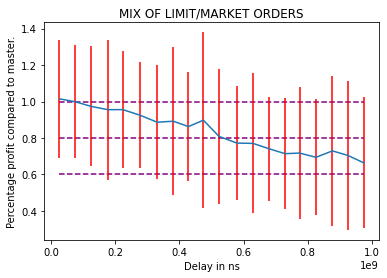

In [5]:
plt.xlabel('Delay in ns')
plt.ylabel('Percentage profit compared to master.')
plt.title('MIX OF LIMIT/MARKET ORDERS')
xmin, xmax= temp_1.DELAY['mean'].min(), temp_1.DELAY['mean'].max()
plt.hlines(y=[0.6, 0.8, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.errorbar(temp_1.DELAY['mean'], temp_1.PERCENT['mean'], yerr=temp_1.PERCENT['std'], ecolor='red')  
plt.show()

In [6]:
# Herd04 config

PATHS = []
for file in os.listdir('log'):
    if 'herd04' in file:
        PATHS.append(f'log/{file}')

df, slave_ids, master_ids = get_delays_and_profits(PATHS)
df

,DELAY,SLAVE_PROFIT,SLAVE_ORDERS,MASTER_PROFIT,MASTER_ORDERS,SIMULATION,PERCENT_ORDERS,PERCENT
0,286883,1618.0,229,7463,227,log/herd04_seed_422396446,1.008811,0.216803
1,342187,8117.0,223,7959,223,log/herd04_seed_3842306364,1.000000,1.019852
2,428872,5548.0,207,5672,206,log/herd04_seed_1345499493,1.004854,0.978138
3,850660,5929.0,228,7959,223,log/herd04_seed_3842306364,1.022422,0.744943
4,1003303,10293.0,227,10547,227,log/herd04_seed_602957303,1.000000,0.975917
...,...,...,...,...,...,...,...,...
5995,998611239,1698.0,173,4981,218,log/herd04_seed_2876537340,0.793578,0.340895
5996,998738060,5686.0,193,6857,219,log/herd04_seed_1923688040,0.881279,0.829226
5997,998973671,9345.0,217,8345,240,log/herd04_seed_1261063143,0.904167,1.119832
5998,999444814,13219.0,211,5419,210,log/herd04_seed_1768615473,1.004762,2.439380


In [7]:
df['g'] = df.index//300
temp_2 = df.groupby('g').agg(['mean', 'std'])
temp_2

DELAY               SLAVE_PROFIT              SLAVE_ORDERS  \
            mean           std         mean          std         mean   
g                                                                       
0   2.599193e+07  1.497188e+07  9225.273333  5546.062491   212.813333   
1   7.482449e+07  1.418810e+07  8510.350000  4482.921686   210.486667   
2   1.237401e+08  1.472173e+07  8601.390000  5149.134640   208.366667   
3   1.765181e+08  1.430960e+07  9181.946667  6056.928642   207.843333   
4   2.239471e+08  1.459970e+07  9043.823333  5916.640942   203.216667   
5   2.772314e+08  1.485603e+07  9259.386667  5865.666299   204.076667   
6   3.308337e+08  1.567792e+07  8614.353333  5474.913255   203.306667   
7   3.809213e+08  1.420441e+07  8906.850000  6737.910613   201.000000   
8   4.282417e+08  1.397103e+07  9684.103333  7038.048660   200.366667   
9   4.748018e+08  1.233859e+07  8989.736667  6339.889451   197.480000   
10  5.237470e+08  1.624924e+07  8118.053333  5544.413230   196.836667   
11  5.794474e+08  1.542855e+07  8265.410000  5311.062595   195.240000   
12  6.296114e+08  1.369760e+07  8425.623333  6223.261916   194.233333   
13  6.802370e+08  1.480414e+07  8087.576667  4865.851556   193.703333   
14  7.294241e+08  1.261331e+07  8297.576667  5595.637216   192.720000   
15  7.745879e+08  1.380868e+07  8286.036667  5434.570692   189.533333   
16  8.258070e+08  1.542038e+07  8375.730000  6128.606646   188.126667   
17  8.771747e+08  1.293181e+07  9108.140000  6178.277684   189.983333   
18  9.256565e+08  1.473236e+07  8937.450000  7472.431445   185.563333   
19  9.748717e+08  1.428819e+07  8631.570000  6653.075279   185.923333   

              MASTER_PROFIT              MASTER_ORDERS             \
          std          mean          std          mean        std   
g                                                                   
0   11.017400   9132.676667  5053.850992    215.396667  10.656666   
1   11.175545   8578.983333  4050.085285    215.543333   9.887399   
2   12.476824   8710.060000  4515.663388    214.826667  10.133719   
3   13.066032   9039.710000  4969.031826    215.760000  10.096643   
4   12.829329   9080.283333  4852.283068    212.986667   9.308526   
5   14.183135   9367.860000  4779.487356    214.806667   9.674085   
6   14.012869   8916.856667  4707.835285    215.156667   9.384331   
7   13.621250   8679.253333  4526.414146    215.070000   9.335359   
8   14.299667   9151.576667  4662.449865    214.553333  10.007380   
9   14.352570   8918.936667  4664.160633    215.066667   9.269410   
10  15.114169   8516.616667  4029.286768    215.753333   9.543028   
11  15.554707   8583.626667  3788.132458    215.610000   9.928401   
12  16.489144   8617.473333  4741.219168    214.676667  10.185838   
13  16.285352   8625.180000  3992.945346    214.670000  10.144166   
14  16.401370   8704.853333  4128.536741    215.676667  10.347739   
15  16.931563   8700.926667  4423.395741    214.853333  10.156558   
16  16.681072   8925.973333  4532.323475    214.733333  10.048822   
17  16.601458   8917.400000  4034.185601    216.023333  10.209320   
18  16.875681   9134.293333  4449.804684    215.243333  10.445469   
19  16.908097   9516.860000  5897.470108    215.193333   9.880691   

   PERCENT_ORDERS             PERCENT            
             mean       std      mean       std  
g                                                
0        0.988138  0.022255  1.015329  0.322493  
1        0.976496  0.024100  0.992320  0.268130  
2        0.969662  0.027457  0.981005  0.316073  
3        0.962917  0.029977  0.999101  0.400415  
4        0.953654  0.031045  0.983403  0.353306  
5        0.949446  0.037126  0.985976  0.390688  
6        0.944381  0.038865  0.964605  0.387759  
7        0.934079  0.037871  1.014091  0.528746  
8        0.933342  0.039574  1.039920  0.509493  
9        0.917683  0.043172  0.999510  0.529656  
10       0.911615  0.044490  0.957364  0.463166  
11       0.904849  0.046917  0.954960  0.43

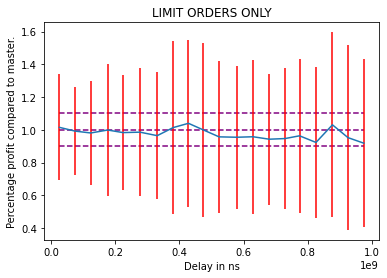

In [8]:
plt.xlabel('Delay in ns')
plt.ylabel('Percentage profit compared to master.')
plt.title('LIMIT ORDERS ONLY')
xmin, xmax= temp_2.DELAY['mean'].min(), temp_2.DELAY['mean'].max()
plt.hlines(y=[1.1, 0.9, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.errorbar(temp_2.DELAY['mean'], temp_2.PERCENT['mean'], yerr=temp_2.PERCENT['std'], ecolor='red')  
plt.show()

In [9]:
# Herd05 config

PATHS = []
for file in os.listdir('log'):
    if 'herd05' in file:
        PATHS.append(f'log/{file}')

df, slave_ids, master_ids = get_delays_and_profits(PATHS)
df

,DELAY,SLAVE_PROFIT,SLAVE_ORDERS,MASTER_PROFIT,MASTER_ORDERS,SIMULATION,PERCENT_ORDERS,PERCENT
0,286883,1104.0,241,7016,239,log/herd05_seed_422396446,1.008368,0.157355
1,342187,9624.0,233,8717,237,log/herd05_seed_3842306364,0.983122,1.104050
2,428872,5725.0,231,5891,232,log/herd05_seed_1345499493,0.995690,0.971821
3,850660,4929.0,231,8717,237,log/herd05_seed_3842306364,0.974684,0.565447
4,1003303,10742.0,247,11153,252,log/herd05_seed_602957303,0.980159,0.963149
...,...,...,...,...,...,...,...,...
5995,998611239,1114.0,240,5245,238,log/herd05_seed_2876537340,1.008403,0.212393
5996,998738060,4902.0,239,7662,248,log/herd05_seed_1923688040,0.963710,0.639781
5997,998973671,871.0,234,4913,244,log/herd05_seed_1261063143,0.959016,0.177285
5998,999444814,3021.0,236,5802,248,log/herd05_seed_1768615473,0.951613,0.520683


In [10]:
df['g'] = df.index//300
temp_3 = df.groupby('g').agg(['mean', 'std'])
temp_3

DELAY               SLAVE_PROFIT              SLAVE_ORDERS  \
            mean           std         mean          std         mean   
g                                                                       
0   2.599193e+07  1.497188e+07  9990.336667  5741.881308   242.510000   
1   7.482449e+07  1.418810e+07  9355.753333  4544.614845   241.573333   
2   1.237401e+08  1.472173e+07  9212.356667  5139.416636   241.660000   
3   1.765181e+08  1.430960e+07  9051.213333  5414.094050   240.350000   
4   2.239471e+08  1.459970e+07  9018.566667  4681.905611   240.496667   
5   2.772314e+08  1.485603e+07  8808.143333  4741.854542   240.483333   
6   3.308337e+08  1.567792e+07  8108.420000  4494.472516   239.740000   
7   3.809213e+08  1.420441e+07  7864.870000  4717.238622   239.200000   
8   4.282417e+08  1.397103e+07  8005.206667  4602.529878   239.590000   
9   4.748018e+08  1.233859e+07  7911.943333  4869.180218   238.666667   
10  5.237470e+08  1.624924e+07  6801.973333  3870.533437   238.913333   
11  5.794474e+08  1.542855e+07  6587.536667  3745.787132   238.303333   
12  6.296114e+08  1.369760e+07  6679.793333  4915.339226   238.250000   
13  6.802370e+08  1.480414e+07  6327.866667  4072.300200   238.736667   
14  7.294241e+08  1.261331e+07  6109.713333  4013.079456   238.160000   
15  7.745879e+08  1.380868e+07  6090.523333  4310.963994   238.156667   
16  8.258070e+08  1.542038e+07  6025.270000  4051.162058   237.983333   
17  8.771747e+08  1.293181e+07  6220.176667  4481.502752   237.603333   
18  9.256565e+08  1.473236e+07  6337.163333  4745.305102   237.313333   
19  9.748717e+08  1.428819e+07  6161.466667  5526.115398   237.323333   

             MASTER_PROFIT              MASTER_ORDERS            \
         std          mean          std          mean       std   
g                                                                 
0   5.989112  10101.750000  5564.329895    243.370000  6.409632   
1   4.869325   9567.386667  4109.254098    243.050000  5.440542   
2   4.693737   9822.273333  4910.986058    242.550000  5.868757   
3   5.083994  10017.413333  5403.139774    243.113333  6.131269   
4   4.228031  10212.950000  5178.553422    242.943333  5.862424   
5   4.304045  10455.036667  5144.485400    243.580000  5.952173   
6   3.851647  10032.043333  5132.477318    242.930000  5.920750   
7   3.776357   9686.703333  4871.578992    242.686667  6.100207   
8   3.769518  10188.216667  4892.607735    243.316667  5.979596   
9   3.811033  10079.066667  5033.617437    243.000000  5.847562   
10  3.518583   9485.106667  4161.826986    242.603333  5.412668   
11  3.648153   9561.393333  3808.329075    242.663333  5.103935   
12  3.415609   9652.363333  5174.061820    242.853333  6.113625   
13  3.501646   9675.950000  4177.825244    242.956667  5.498688   
14  3.455556   9521.336667  4166.186500    242.863333  5.373475   
15  3.704664   9590.440000  4579.165670    242.960000  5.502058   
16  3.330671   9943.960000  4607.585808    242.723333  5.653317   
17  3.144139   9876.850000  4164.932366    243.743333  5.250016   
18  3.047312  10184.273333  4616.520985    243.156667  5.501486   
19  2.878613  10558.086667  6637.229287    243.736667  7.157146   

   PERCENT_ORDERS             PERCENT            
             mean       std      mean       std  
g                                                
0        0.996750  0.022074  1.001233  0.352156  
1        0.994182  0.020483  0.987965  0.397888  
2        0.996684  0.022476  0.948569  0.398910  
3        0.989013  0.023863  0.902133  0.400071  
4        0.990377  0.024949  0.919246  0.452952  
5        0.987717  0.024204  0.851895  0.292961  
6        0.987308  0.023304  0.822389  0.377076  
7        0.986106  0.023801  0.826509  0.444454  
8        0.985142  0.023692  0.785976  0.313561  
9        0.982607  0.023536  0.802126  0.493169  
10       0.985159  0.021455  0.727928  0.392632  
11       0.982351  0.020673  0.675539  0.338298  
12       0.981515  0.022695  0.691193  

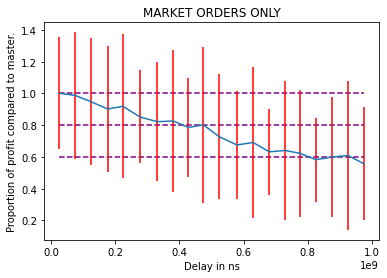

In [11]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit compared to master.')
plt.title('MARKET ORDERS ONLY')
xmin, xmax= temp_3.DELAY['mean'].min(), temp_3.DELAY['mean'].max()
plt.hlines(y=[0.6, 0.8, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.errorbar(temp_3.DELAY['mean'], temp_3.PERCENT['mean'], yerr=temp_3.PERCENT['std'], ecolor='red')  
plt.show()

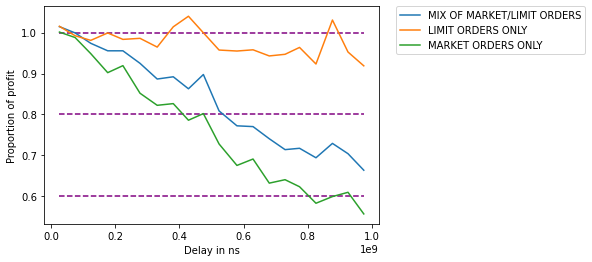

In [69]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit')
#plt.title('COMPARISON OF TRADING STATEGIES')
xmin, xmax= temp_3.DELAY['mean'].min(), temp_3.DELAY['mean'].max()
plt.hlines(y=[0.6, 0.8, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.plot(temp_1.DELAY['mean'], temp_1.PERCENT['mean'], label="MIX OF MARKET/LIMIT ORDERS")
plt.plot(temp_2.DELAY['mean'], temp_2.PERCENT['mean'], label="LIMIT ORDERS ONLY")
plt.plot(temp_3.DELAY['mean'], temp_3.PERCENT['mean'], label="MARKET ORDERS ONLY")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

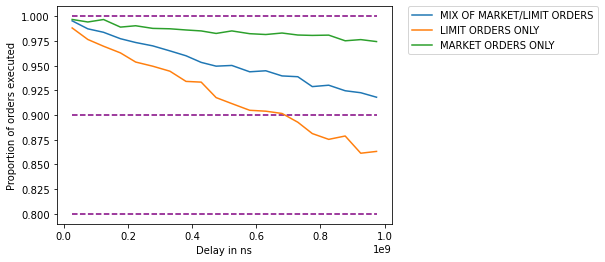

In [70]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of orders executed')
#plt.title('COMPARISON OF TRADING STATEGIES')
xmin, xmax= temp_3.DELAY['mean'].min(), temp_3.DELAY['mean'].max()
plt.hlines(y=[0.8, 0.9, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.plot(temp_1.DELAY['mean'], temp_1.PERCENT_ORDERS['mean'], label="MIX OF MARKET/LIMIT ORDERS")
plt.plot(temp_2.DELAY['mean'], temp_2.PERCENT_ORDERS['mean'], label="LIMIT ORDERS ONLY")
plt.plot(temp_3.DELAY['mean'], temp_3.PERCENT_ORDERS['mean'], label="MARKET ORDERS ONLY")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [ ]:
CONFIG = '09'
PATHS = []
for file in os.listdir(f'log/conf{CONFIG}_log_mazza_09_02_2021/log'):
    if f'herd{CONFIG}' in file:
        PATHS.append(f'log/conf{CONFIG}_log_mazza_09_02_2021/log/{file}')

df, slave_ids, master_ids = get_delays_and_profits(PATHS)
df

In [26]:
df['g'] = df.index//300
temp_7 = df.groupby('g').agg(['mean', 'std'])
temp_7

DELAY                SLAVE_PROFIT              SLAVE_ORDERS  \
            mean           std          mean          std         mean   
g                                                                        
0   2.424538e+08  1.429104e+08  11603.420000  7778.471531   331.533333   
1   7.612900e+08  1.500979e+08  10461.600000  7882.369300   320.663333   
2   1.231898e+09  1.444128e+08  10422.493333  8643.781787   314.313333   
3   1.732661e+09  1.442401e+08   9311.060000  6822.005454   308.890000   
4   2.241167e+09  1.397908e+08   9472.220000  7299.229727   304.090000   
5   2.776357e+09  1.578997e+08   8736.286667  7430.654849   299.066667   
6   3.302548e+09  1.513426e+08   8551.210000  6291.082834   293.976667   
7   3.803396e+09  1.424914e+08   7826.806667  7129.188534   292.883333   
8   4.310347e+09  1.476809e+08   7187.440000  5750.819394   289.700000   
9   4.796615e+09  1.410376e+08   7345.370000  7614.893995   287.090000   
10  5.268776e+09  1.314800e+08   7212.926667  6105.464708   283.450000   
11  5.718095e+09  1.333255e+08   6332.830000  4822.871816   281.296667   
12  6.173579e+09  1.428554e+08   6394.606667  6097.378838   278.826667   
13  6.701474e+09  1.561559e+08   5967.993333  5484.547637   277.046667   
14  7.220207e+09  1.466382e+08   5346.390000  4407.288311   275.003333   
15  7.726800e+09  1.534993e+08   5770.680000  5630.142907   271.960000   
16  8.222555e+09  1.360131e+08   5482.496667  5477.948386   270.406667   
17  8.742646e+09  1.569585e+08   4867.486667  4901.938396   268.533333   
18  9.277215e+09  1.415612e+08   5116.603333  5402.695770   266.046667   
19  9.756082e+09  1.324901e+08   4065.560000  4429.154293   265.000000   

              MASTER_PROFIT              MASTER_ORDERS             \
          std          mean          std          mean        std   
g                                                                   
0   10.509856  12152.450000  7372.720558    338.803333   9.131041   
1   10.684749  11714.203333  7745.341773    337.920000   9.992318   
2   10.669330  12533.930000  9171.381872    337.903333   9.586815   
3   11.479132  11706.040000  7409.548387    337.960000   9.205480   
4   11.009052  12079.696667  8265.119105    338.590000   9.891480   
5   10.609308  12141.996667  8803.395282    338.873333   9.577563   
6   11.314423  12479.390000  7378.792946    337.160000   9.867741   
7   10.509896  11869.306667  8734.678578    338.883333   9.528503   
8   10.670341  11413.536667  6567.576808    338.676667   9.958717   
9   10.390787  12259.633333  9401.708148    338.006667  10.128932   
10  10.295021  12239.933333  7713.745047    337.633333   9.543365   
11   9.728178  11556.453333  6276.500857    337.616667   9.470764   
12   9.973038  11824.260000  8043.099744    338.733333   9.298590   
13   9.666573  11723.093333  6830.345932    339.103333   9.365452   
14  10.317533  11279.143333  6271.021143    337.653333  10.013026   
15   9.388586  12393.263333  7800.959506    338.103333   9.140998   
16   9.493597  12253.953333  7584.610248    338.206667   9.714518   
17   9.231447  11953.083333  6732.376979    338.310000   9.995345   
18   9.135792  12501.096667  8233.308410    338.513333   9.742323   
19   9.714658  11474.736667  6888.798825    337.750000   9.845334   

   PERCENT_ORDERS             PERCENT            
             mean       std      mean       std  
g                                                
0        0.978594  0.019279  0.953467  0.235098  
1        0.949098  0.023090  0.906768  0.307365  
2        0.930340  0.024101  0.842734  0.319321  
3        0.914085  0.026798  0.803654  0.315040  
4        0.898357  0.028628  0.792257  0.289403  
5        0.882788  0.028465  0.733010  0.303914  
6        0.872083  0.027654  0.695015  0.291819  
7        0.864537  0.029199  0.667200  0.283306  
8        0.855597  0.026807  0.626053  0.282629  
9        0.849734  0.030526  0.589295  0.267237  
10       0.839776  0.028138  0.591466  0.272371  
11       0.833438  0

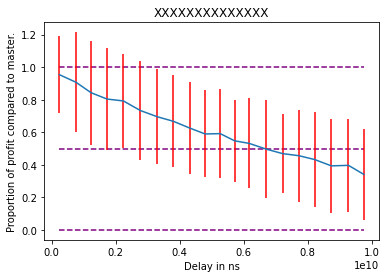

In [27]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit compared to master.')
plt.title('XXXXXXXXXXXXXX')
xmin, xmax= temp_7.DELAY['mean'].min(), temp_7.DELAY['mean'].max()
plt.hlines(y=[0.0, 0.5, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.errorbar(temp_7.DELAY['mean'], temp_7.PERCENT['mean'], yerr=temp_7.PERCENT['std'], ecolor='red')  
plt.show()

In [ ]:
CONFIG = '11'
PATHS = []
for file in os.listdir(f'log/conf{CONFIG}_log_mazza_09_02_2021/log'):
    if f'herd{CONFIG}' in file:
        PATHS.append(f'log/conf{CONFIG}_log_mazza_09_02_2021/log/{file}')

df, slave_ids, master_ids = get_delays_and_profits(PATHS)
df

In [32]:
df['g'] = df.index//300
temp_9 = df.groupby('g').agg(['mean', 'std'])
temp_9

DELAY                SLAVE_PROFIT              SLAVE_ORDERS  \
            mean           std          mean          std         mean   
g                                                                        
0   2.424538e+08  1.429104e+08  12076.230000  7054.149798   323.196667   
1   7.612900e+08  1.500979e+08  10700.100000  8607.891535   299.870000   
2   1.231898e+09  1.444128e+08  10430.903333  9592.689288   285.856667   
3   1.732661e+09  1.442401e+08   9347.580000  8619.639203   274.433333   
4   2.241167e+09  1.397908e+08   9432.600000  9288.692057   265.703333   
5   2.776357e+09  1.578997e+08   8964.043333  9028.633843   257.773333   
6   3.302548e+09  1.513426e+08   8369.523333  7299.181535   248.203333   
7   3.803396e+09  1.424914e+08   7933.010000  8036.978739   242.453333   
8   4.310347e+09  1.476809e+08   7003.143333  7088.964467   235.046667   
9   4.796615e+09  1.410376e+08   7214.706667  6993.810572   231.736667   
10  5.268776e+09  1.314800e+08   6895.886667  6721.895653   222.630000   
11  5.718095e+09  1.333255e+08   6435.540000  6403.543676   220.380000   
12  6.173579e+09  1.428554e+08   6343.830000  7297.040220   215.160000   
13  6.701474e+09  1.561559e+08   6186.410000  6390.688101   211.183333   
14  7.220207e+09  1.466382e+08   5152.580000  4827.083020   203.786667   
15  7.726800e+09  1.534993e+08   5920.036667  6900.294347   199.423333   
16  8.222555e+09  1.360131e+08   5602.046667  6570.768658   196.240000   
17  8.742646e+09  1.569585e+08   5108.786667  5648.445586   191.793333   
18  9.277215e+09  1.415612e+08   5610.616667  6282.759983   189.300000   
19  9.756082e+09  1.324901e+08   4453.470000  5021.337245   186.770000   

              MASTER_PROFIT              MASTER_ORDERS             \
          std          mean          std          mean        std   
g                                                                   
0   16.479378  11895.466667  6788.954989    339.453333   8.529772   
1   17.015430  11714.450000  7309.220128    338.113333   9.214673   
2   15.700035  12355.733333  8587.386615    338.790000   9.357588   
3   17.851830  11529.836667  6835.554403    338.276667   8.481346   
4   18.226978  11973.650000  7939.432958    339.313333   9.667818   
5   17.097653  11951.463333  8443.016522    339.056667   9.114294   
6   16.792118  12521.843333  6820.048031    338.393333   8.545293   
7   17.752700  11807.286667  8397.390288    339.066667   8.934669   
8   18.869854  11387.506667  6407.029277    338.976667   9.042604   
9   18.159107  12216.286667  9103.718453    338.630000   9.177537   
10  17.930554  11959.116667  7240.333275    338.153333   9.509183   
11  17.553042  11581.363333  6057.891000    338.120000   8.338507   
12  17.359693  11659.923333  7361.033216    340.150000   9.222673   
13  17.765371  11674.376667  6573.871689    339.333333   8.124176   
14  18.630211  11249.143333  5790.255168    338.480000   8.132860   
15  17.707323  12299.370000  7528.966868    338.486667   8.234633   
16  17.962495  12247.866667  7371.185980    339.420000   9.168632   
17  16.155721  11904.903333  6491.242418    338.750000   8.588366   
18  16.169979  12478.263333  7896.983161    340.546667  10.231165   
19  15.641375  11600.350000  6751.094613    338.290000   8.964025   

   PERCENT_ORDERS             PERCENT            
             mean       std      mean       std  
g                                                
0        0.952042  0.040525  1.033536  0.274992  
1        0.886716  0.040282  0.917361  0.327065  
2        0.843742  0.039824  0.842383  0.340931  
3        0.811119  0.046155  0.791791  0.386336  
4        0.782953  0.047161  0.779955  0.454320  
5        0.760198  0.044971  0.738133  0.406985  
6        0.733403  0.044932  0.663078  0.365786  
7        0.715101  0.049305  0.677299  0.395143  
8        0.693326  0.051365  0.620824  0.436000  
9        0.684372  0.050770  0.594236  0.337280  
10       0.658388  0.049804  0.582212  0.443602  
11       0.651802  0

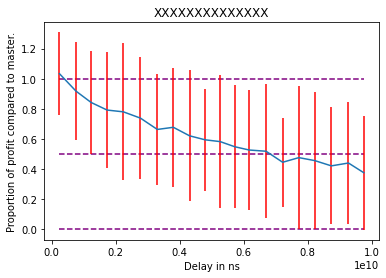

In [33]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit compared to master.')
plt.title('XXXXXXXXXXXXXX')
xmin, xmax= temp_9.DELAY['mean'].min(), temp_9.DELAY['mean'].max()
plt.hlines(y=[0.0, 0.5, 1.0], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.errorbar(temp_9.DELAY['mean'], temp_9.PERCENT['mean'], yerr=temp_9.PERCENT['std'], ecolor='red')  
plt.show()

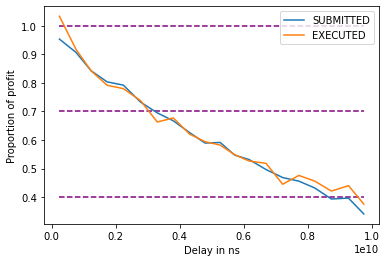

In [57]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit')
#plt.title('COMPARISON OF TRADING STATEGIES')
xmin, xmax= temp_7.DELAY['mean'].min(), temp_7.DELAY['mean'].max()
plt.hlines(y=[0.4, 0.7, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.plot(temp_7.DELAY['mean'], temp_7.PERCENT['mean'], label="SUBMITTED")
#plt.plot(temp_8.DELAY['mean'], temp_8.PERCENT['mean'], label="ACCEPTED")
plt.plot(temp_9.DELAY['mean'], temp_9.PERCENT['mean'], label="EXECUTED")
plt.legend(loc='upper right')

plt.show()

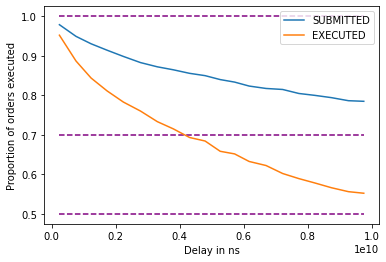

In [58]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of orders executed')
#plt.title('COMPARISON OF TRADING STATEGIES')
xmin, xmax= temp_7.DELAY['mean'].min(), temp_7.DELAY['mean'].max()
plt.hlines(y=[0.5, 0.7, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.plot(temp_7.DELAY['mean'], temp_7.PERCENT_ORDERS['mean'], label="SUBMITTED")
#plt.plot(temp_8.DELAY['mean'], temp_8.PERCENT['mean'], label="ACCEPTED")
plt.plot(temp_9.DELAY['mean'], temp_9.PERCENT_ORDERS['mean'], label="EXECUTED")
plt.legend(loc='upper right')

plt.show()

In [71]:
CONFIG = '12'
PATHS = []
for file in os.listdir(f'log/conf{CONFIG}_log_mazza_09_02_2021/log'):
    if f'herd{CONFIG}' in file:
        PATHS.append(f'log/conf{CONFIG}_log_mazza_09_02_2021/log/{file}')

df_12, slave_ids, master_ids = get_delays_and_profits(PATHS)
df_12

,DELAY,SLAVE_PROFIT,SLAVE_ORDERS,MASTER_PROFIT,MASTER_ORDERS,SIMULATION,PERCENT_ORDERS,PERCENT
0,16072,7044.0,330,7172,334,log/conf12_log_mazza_09_02_2021/log/herd12_see...,0.988024,0.982153
1,36268,10754.0,337,10808,336,log/conf12_log_mazza_09_02_2021/log/herd12_see...,1.002976,0.995004
2,86806,10041.0,335,10195,336,log/conf12_log_mazza_09_02_2021/log/herd12_see...,0.997024,0.984895
3,91612,6590.0,331,6340,328,log/conf12_log_mazza_09_02_2021/log/herd12_see...,1.009146,1.039432
4,98670,12906.0,342,12339,337,log/conf12_log_mazza_09_02_2021/log/herd12_see...,1.014837,1.045952
...,...,...,...,...,...,...,...,...
5995,1952136879,3323.0,293,7299,329,log/conf12_log_mazza_09_02_2021/log/herd12_see...,0.890578,0.455268
5996,2019327050,10636.0,296,6377,333,log/conf12_log_mazza_09_02_2021/log/herd12_see...,0.888889,1.667869
5997,2072448382,989.0,293,4930,330,log/conf12_log_mazza_09_02_2021/log/herd12_see...,0.887879,0.200609
5998,2360773233,-317.0,267,10524,325,log/conf12_log_mazza_09_02_2021/log/herd12_see...,0.821538,-0.030122


In [72]:
df_12['g'] = df_12.index//300
temp_10 = df_12.groupby('g').agg(['mean', 'std'])
temp_10

DELAY                SLAVE_PROFIT              SLAVE_ORDERS  \
            mean           std          mean          std         mean   
g                                                                        
0   5.861441e+06  3.523756e+06  11301.383333  7195.151491   336.176667   
1   1.866517e+07  3.926059e+06  11543.590000  8254.644119   336.310000   
2   3.336921e+07  4.689502e+06  10592.050000  7869.391728   333.506667   
3   4.962935e+07  4.775695e+06  10147.576667  6709.298420   332.483333   
4   6.574119e+07  4.312908e+06   9615.070000  7966.516338   330.360000   
5   8.120509e+07  4.649108e+06   8526.536667  5884.018602   328.856667   
6   9.978470e+07  5.650958e+06   9009.826667  6434.505804   327.136667   
7   1.197133e+08  5.922042e+06   8700.880000  6766.838874   324.423333   
8   1.404440e+08  6.076385e+06   7952.246667  6660.192860   324.506667   
9   1.644363e+08  7.756166e+06   7015.310000  5289.770860   321.363333   
10  1.891893e+08  7.707936e+06   7514.723333  6989.498584   321.793333   
11  2.160292e+08  7.490571e+06   8243.290000  7399.897108   319.506667   
12  2.451274e+08  9.912346e+06   7106.676667  7804.439979   318.040000   
13  2.804797e+08  1.036541e+07   7913.153333  7679.646557   316.020000   
14  3.224800e+08  1.292249e+07   6922.133333  6487.640099   314.050000   
15  3.691956e+08  1.638665e+07   6898.393333  6893.392137   312.043333   
16  4.314716e+08  1.941909e+07   6753.833333  5745.539410   310.336667   
17  5.104928e+08  2.639258e+07   6132.016667  6814.696040   308.976667   
18  6.276664e+08  4.580728e+07   5409.396667  5974.927782   306.130000   
19  9.937474e+08  2.562606e+08   5930.250000  5912.152566   303.136667   

              MASTER_PROFIT              MASTER_ORDERS            \
          std          mean          std          mean       std   
g                                                                  
0    8.860426  11422.346667  6892.173556    337.780000  8.549967   
1    9.222658  12438.436667  8960.053989    338.956667  9.152450   
2    9.512004  11760.373333  8826.962025    337.936667  9.080428   
3    9.942799  11725.023333  7348.836142    338.706667  9.391198   
4    9.211219  12387.373333  9105.797441    338.243333  8.950857   
5    9.651942  10838.336667  6478.313068    337.873333  8.664923   
6    9.601665  11835.183333  7347.859741    337.966667  8.788040   
7   10.070859  11616.133333  7567.635689    337.473333  9.264379   
8    9.889183  11849.780000  7554.468031    338.543333  8.820476   
9    9.721093  10765.656667  5588.955323    337.326667  8.765237   
10   9.968711  11954.920000  8027.337769    339.226667  9.144435   
11   9.103453  12160.336667  8570.290504    338.436667  8.978942   
12   9.486043  11866.063333  9162.584971    338.483333  8.728709   
13   9.755863  13108.510000  9299.392470    338.183333  9.123991   
14  10.761359  12021.140000  7474.471884    338.150000  9.163007   
15   9.695090  12247.023333  7852.804570    338.300000  9.252497   
16  10.168644  12247.520000  6477.329861    338.346667  9.137366   
17  10.868142  12312.020000  8025.756977    337.813333  8.862296   
18  10.045037  11388.913333  6001.543818    337.040000  8.376891   
19  11.554929  11488.710000  6903.931025    338.213333  8.940223   

   PERCENT_ORDERS             PERCENT            
             mean       std      mean       std  
g                                                
0        0.995339  0.014906  1.002480  0.289183  
1        0.992346  0.018106  0.938104  0.263850  
2        0.987066  0.020789  0.915426  0.279765  
3        0.981729  0.017964  0.878300  0.256228  
4        0.976848  0.019380  0.789367  0.281678  
5        0.973414  0.019659  0.786624  0.280955  
6        0.968121  0.022317  0.768938  0.248594  
7        0.961484  0.022165  0.748972  0.293981  
8        0.958650  0.021057  0.668202  0.297291  
9        0.952759  0.019286  0.637842  0.275634  
10       0.948752  0.021962  0.608576  0.263626  
11       0.944259  0.021506  0.662907  0.30

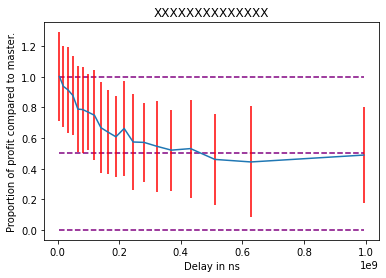

In [49]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit compared to master.')
plt.title('XXXXXXXXXXXXXX')
xmin, xmax= temp_10.DELAY['mean'].min(), temp_10.DELAY['mean'].max()
plt.hlines(y=[0.0, 0.5, 1.0], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.errorbar(temp_10.DELAY['mean'], temp_10.PERCENT['mean'], yerr=temp_10.PERCENT['std'], ecolor='red')  
plt.show()

In [75]:
CONFIG = '13'
PATHS = []
for file in os.listdir(f'log/conf{CONFIG}_log_mazza_09_02_2021/log'):
    if f'herd{CONFIG}' in file:
        PATHS.append(f'log/conf{CONFIG}_log_mazza_09_02_2021/log/{file}')

df_13, slave_ids, master_ids = get_delays_and_profits(PATHS)
df_13

,DELAY,SLAVE_PROFIT,SLAVE_ORDERS,MASTER_PROFIT,MASTER_ORDERS,SIMULATION,PERCENT_ORDERS,PERCENT
0,107147,6567.0,323,6473,325,log/conf13_log_mazza_09_02_2021/log/herd13_see...,0.993846,1.014522
1,241798,10778.0,331,10579,336,log/conf13_log_mazza_09_02_2021/log/herd13_see...,0.985119,1.018811
2,578741,11108.0,335,11286,338,log/conf13_log_mazza_09_02_2021/log/herd13_see...,0.991124,0.984228
3,610785,6892.0,331,6887,337,log/conf13_log_mazza_09_02_2021/log/herd13_see...,0.982196,1.000726
4,657845,12471.0,338,12347,360,log/conf13_log_mazza_09_02_2021/log/herd13_see...,0.938889,1.010043
...,...,...,...,...,...,...,...,...
5995,62499447566,453.0,263,6870,320,log/conf13_log_mazza_09_02_2021/log/herd13_see...,0.821875,0.065939
5996,68825041176,3722.0,244,5930,332,log/conf13_log_mazza_09_02_2021/log/herd13_see...,0.734940,0.627656
5997,74243057679,-900.0,244,4146,329,log/conf13_log_mazza_09_02_2021/log/herd13_see...,0.741641,-0.217077
5998,111386496386,-1031.0,256,10003,323,log/conf13_log_mazza_09_02_2021/log/herd13_see...,0.792570,-0.103069


In [76]:
df_13['g'] = df_13.index//300
temp_11 = df_13.groupby('g').agg(['mean', 'std'])
temp_11

DELAY                SLAVE_PROFIT              SLAVE_ORDERS  \
            mean           std          mean          std         mean   
g                                                                        
0   3.928479e+07  2.368153e+07  11476.503333  7768.374479   334.986667   
1   1.260656e+08  2.683522e+07  11952.136667  9825.059137   333.600000   
2   2.275858e+08  3.268330e+07  11049.710000  9265.747753   329.383333   
3   3.421616e+08  3.401093e+07  10113.896667  7233.352593   326.686667   
4   4.581447e+08  3.138178e+07   9961.963333  9156.051361   323.690000   
5   5.718657e+08  3.454955e+07   8804.666667  7226.497231   320.183333   
6   7.116709e+08  4.302614e+07   9128.950000  6793.902746   317.370000   
7   8.654870e+08  4.631850e+07   9125.806667  7563.474754   313.663333   
8   1.029883e+09  4.883598e+07   8207.156667  7095.551679   312.833333   
9   1.226020e+09  6.434113e+07   7393.423333  5769.035131   308.896667   
10  1.434924e+09  6.615002e+07   7664.846667  7272.874694   307.273333   
11  1.669352e+09  6.660081e+07   8496.456667  7887.087983   303.933333   
12  1.933444e+09  9.171599e+07   7524.476667  8027.118925   301.060000   
13  2.268136e+09  1.005816e+08   7918.790000  7737.565840   297.826667   
14  2.687157e+09  1.323127e+08   6873.860000  6214.093239   294.540000   
15  3.181918e+09  1.791248e+08   6983.840000  7107.828926   290.133333   
16  3.891126e+09  2.302910e+08   6466.476667  5044.925523   285.973333   
17  4.881785e+09  3.476417e+08   5976.550000  6745.109657   281.380000   
18  6.567178e+09  7.143527e+08   5048.130000  5938.968914   275.666667   
19  1.536144e+10  1.230911e+10   4779.940000  5138.320604   263.653333   

              MASTER_PROFIT               MASTER_ORDERS             \
          std          mean           std          mean        std   
g                                                                    
0    9.999991  11388.356667   7056.152955    337.616667   9.875973   
1   10.663600  12598.670000   9615.954054    339.113333  10.387500   
2   10.201140  12110.683333   9774.414250    338.860000  10.668323   
3   10.359838  11682.630000   7371.525020    339.250000  10.526325   
4   10.657666  12672.810000  10017.818235    339.826667  10.605575   
5   10.037874  11043.323333   7158.163805    338.563333  10.070620   
6   10.237306  11957.236667   7924.266843    339.140000  10.513269   
7   10.936270  11792.560000   8103.186613    338.673333  11.084652   
8   10.421496  11943.676667   8336.814904    339.760000  10.195205   
9   11.001337  10888.886667   6257.832648    337.680000   9.909841   
10  10.516683  11940.470000   8475.120693    339.746667   9.792623   
11  10.198476  12287.953333   9171.887518    339.193333  10.258659   
12  10.462694  12060.713333   9743.866322    339.646667  10.357255   
13  10.593900  13180.960000   9773.755206    339.473333  10.875517   
14   9.865741  11984.833333   7584.138654    338.213333  10.040111   
15  10.433524  12490.763333   8791.292705    339.316667  10.495566   
16  10.503987  12158.150000   6549.235512    339.303333  11.465434   
17  11.113985  12477.576667   8570.265327    338.546667  10.939840   
18   9.903323  11288.723333   6238.378895    338.890000  10.101056   
19  11.283211  11567.223333   7219.012983    338.386667  10.047903   

   PERCENT_ORDERS             PERCENT            
             mean       std      mean       std  
g                                                
0        0.992359  0.018144  1.019126  0.317998  
1        0.983947  0.022058  0.951113  0.264962  
2        0.972242  0.019368  0.929140  0.330829  
3        0.963154  0.020101  0.873171  0.281246  
4        0.952816  0.025983  0.791209  0.294010  
5        0.945929  0.022337  0.792921  0.315092  
6        0.936097  0.024823  0.775177  0.271358  
7        0.926484  0.027159  0.780716  0.387550  
8        0.920990  0.024894  0.685457  0.278213  
9        0.914959  0.026478  0.669120  0.309106  
10       0.904622  0.025409  0.633704  0.319996

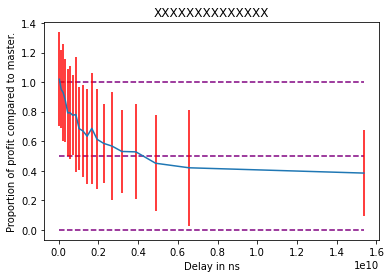

In [52]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit compared to master.')
plt.title('XXXXXXXXXXXXXX')
xmin, xmax= temp_11.DELAY['mean'].min(), temp_11.DELAY['mean'].max()
plt.hlines(y=[0.0, 0.5, 1.0], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.errorbar(temp_11.DELAY['mean'], temp_11.PERCENT['mean'], yerr=temp_11.PERCENT['std'], ecolor='red')  
plt.show()

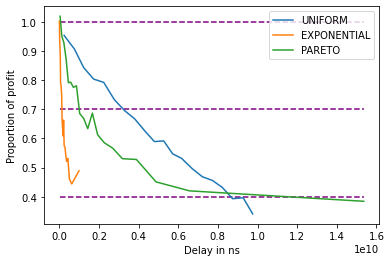

In [56]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit')
#plt.title('COMPARISON OF TRADING STATEGIES')
xmin, xmax= temp_11.DELAY['mean'].min(), temp_11.DELAY['mean'].max()
plt.hlines(y=[0.4, 0.7, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.plot(temp_7.DELAY['mean'], temp_7.PERCENT['mean'], label="UNIFORM")
plt.plot(temp_10.DELAY['mean'], temp_10.PERCENT['mean'], label="EXPONENTIAL")
plt.plot(temp_11.DELAY['mean'], temp_11.PERCENT['mean'], label="PARETO")
plt.legend(loc='upper right')

plt.show()

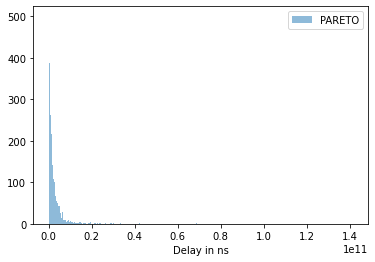

In [100]:
plt.xlabel('Delay in ns')
#plt.hist(df_12.DELAY, bins=100, alpha=0.5, label='EXPONENTIAL')
plt.hist(df_13.DELAY, bins=1000, alpha=0.5, label='PARETO')

plt.legend(loc='upper right')
plt.show()

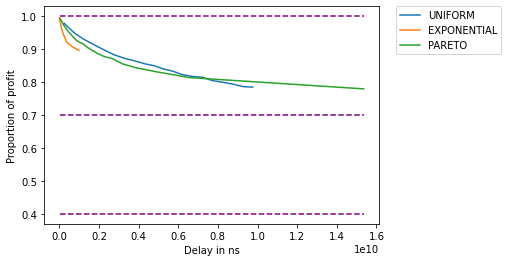

In [54]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit')
#plt.title('COMPARISON OF TRADING STATEGIES')
xmin, xmax= temp_11.DELAY['mean'].min(), temp_11.DELAY['mean'].max()
plt.hlines(y=[0.4, 0.7, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.plot(temp_7.DELAY['mean'], temp_7.PERCENT_ORDERS['mean'], label="UNIFORM")
plt.plot(temp_10.DELAY['mean'], temp_10.PERCENT_ORDERS['mean'], label="EXPONENTIAL")
plt.plot(temp_11.DELAY['mean'], temp_11.PERCENT_ORDERS['mean'], label="PARETO")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [101]:
CONFIG = '14'
PATHS = []
for file in os.listdir(f'log/conf{CONFIG}_log_mazza_09_02_2021/log'):
    if f'herd{CONFIG}' in file:
        PATHS.append(f'log/conf{CONFIG}_log_mazza_09_02_2021/log/{file}')

df, slave_ids, master_ids = get_delays_and_profits(PATHS)
df

,DELAY,SLAVE_PROFIT,SLAVE_ORDERS,MASTER_PROFIT,MASTER_ORDERS,SIMULATION,PERCENT_ORDERS,PERCENT
0,2911124,10516.0,324,10923,333,log/conf14_log_mazza_09_02_2021/log/herd14_see...,0.972973,0.962739
1,3211586,13473.0,348,13712,341,log/conf14_log_mazza_09_02_2021/log/herd14_see...,1.020528,0.982570
2,3837832,17409.0,334,17330,335,log/conf14_log_mazza_09_02_2021/log/herd14_see...,0.997015,1.004559
3,4642389,9592.0,337,6783,333,log/conf14_log_mazza_09_02_2021/log/herd14_see...,1.012012,1.414124
4,4872942,6888.0,338,7190,340,log/conf14_log_mazza_09_02_2021/log/herd14_see...,0.994118,0.957997
...,...,...,...,...,...,...,...,...
19995,9995630865,-4149.0,250,14719,328,log/conf14_log_mazza_09_02_2021/log/herd14_see...,0.762195,-0.281881
19996,9996962490,-4528.0,267,18707,335,log/conf14_log_mazza_09_02_2021/log/herd14_see...,0.797015,-0.242048
19997,9997818026,-1562.0,242,20351,335,log/conf14_log_mazza_09_02_2021/log/herd14_see...,0.722388,-0.076753
19998,9998549515,-643.0,234,6068,333,log/conf14_log_mazza_09_02_2021/log/herd14_see...,0.702703,-0.105966


In [108]:
df['g'] = df.index//900
temp_12 = df.groupby('g').agg(['mean', 'std'])
temp_12

DELAY                SLAVE_PROFIT              SLAVE_ORDERS  \
            mean           std          mean          std         mean   
g                                                                        
0   2.253280e+08  1.271419e+08  10693.624444  6792.716482   330.257778   
1   6.685841e+08  1.318650e+08   9659.347778  6331.138810   319.892222   
2   1.107488e+09  1.271800e+08   8722.398889  7489.641203   312.995556   
3   1.555027e+09  1.325847e+08   7101.640000  5398.991323   303.966667   
4   2.014113e+09  1.325259e+08   6871.945556  5803.677760   297.486667   
5   2.461971e+09  1.297981e+08   6023.585556  6014.206875   293.380000   
6   2.922089e+09  1.350377e+08   5522.923333  6734.776656   288.853333   
7   3.389650e+09  1.414036e+08   4706.701111  5938.932078   283.573333   
8   3.849041e+09  1.276443e+08   4257.155556  5754.358199   281.528889   
9   4.304549e+09  1.351646e+08   3838.836667  6080.587189   276.292222   
10  4.748107e+09  1.184618e+08   3436.462222  6632.892112   274.492222   
11  5.182333e+09  1.298232e+08   2687.304444  5336.846712   271.727778   
12  5.616779e+09  1.244253e+08   2375.303333  5595.305002   269.073333   
13  6.050455e+09  1.278124e+08   2014.644444  4677.978122   267.055556   
14  6.499488e+09  1.349078e+08   1888.806667  5598.372678   264.037778   
15  6.956707e+09  1.291966e+08   1678.716667  6109.587583   262.327778   
16  7.411971e+09  1.318070e+08   1187.367778  5507.096810   259.785556   
17  7.873208e+09  1.312951e+08    655.881111  5072.609337   258.325556   
18  8.321427e+09  1.319914e+08    705.653333  6282.051220   257.095556   
19  8.789803e+09  1.337510e+08    318.000000  5566.333590   255.720000   
20  9.254511e+09  1.290348e+08     80.628889  5160.333526   253.567778   
21  9.690369e+09  1.243780e+08   -366.001111  4425.221969   251.632222   
22  9.945905e+09  3.005415e+07   -940.700000  4114.971434   250.955000   

              MASTER_PROFIT              MASTER_ORDERS             \
          std          mean          std          mean        std   
g                                                                   
0   12.467720  11568.685556  6793.048782    337.910000  11.713189   
1   13.457491  11564.003333  6697.953122    337.813333  11.643320   
2   14.325238  11884.645556  8535.505183    338.911111  14.055938   
3   12.671998  11182.518889  6286.694548    337.613333  11.407481   
4   11.979629  11880.800000  7269.585978    338.204444  12.284285   
5   12.510998  11610.598889  7327.438681    338.160000  12.625387   
6   11.857639  11896.802222  8451.127597    339.257778  14.324392   
7   12.450309  11663.493333  7410.136537    337.697778  12.797464   
8   12.757961  11407.307778  7053.341780    338.287778  12.399203   
9   12.057433  11577.244444  7730.193194    338.273333  13.322840   
10  12.174343  11744.390000  8447.766559    338.526667  14.302483   
11  11.027940  11375.270000  6846.043185    338.164444  11.857312   
12  11.639332  11281.635556  6949.428407    337.547778  11.963559   
13  11.462723  11200.372222  6179.078779    337.635556  10.780470   
14  10.746483  11567.471111  7159.127649    338.184444  12.559154   
15  11.522301  11621.262222  7945.498828    338.392222  13.523783   
16  11.637155  11450.785556  7212.745121    338.243333  12.668956   
17  10.714601  11282.616667  6584.754711    336.851111  11.228046   
18  11.645476  11681.485556  8180.251268    338.713333  14.059386   
19  11.478637  11703.667778  7747.904344    338.744444  13.473544   
20  10.495556  11819.988889  7963.281089    338.401111  13.340338   
21  10.777519  11348.973333  6576.400684    337.741111  11.846379   
22  11.338686  11577.915000  7108.642944    338.265000  12.639365   

   PERCENT_ORDERS             PERCENT            
             mean       std      mean       std  
g                                                
0        0.977655  0.029015  0.935382  0.254863  
1        0.947358  0.036601  0.849096  0.296963  
2        0.924170  0.039629  0.740073  0.

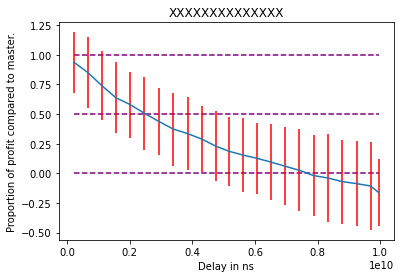

In [109]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit compared to master.')
plt.title('XXXXXXXXXXXXXX')
xmin, xmax= temp_12.DELAY['mean'].min(), temp_12.DELAY['mean'].max()
plt.hlines(y=[0.0, 0.5, 1.0], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.errorbar(temp_12.DELAY['mean'], temp_12.PERCENT['mean'], yerr=temp_12.PERCENT['std'], ecolor='red')  
plt.show()

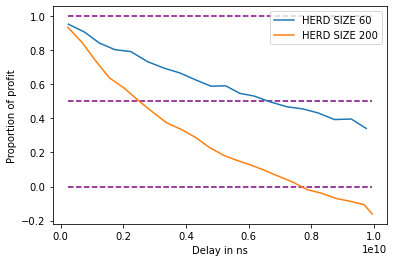

In [110]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit')
#plt.title('COMPARISON OF TRADING STATEGIES')
xmin, xmax= temp_12.DELAY['mean'].min(), temp_12.DELAY['mean'].max()
plt.hlines(y=[0, 0.5, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.plot(temp_7.DELAY['mean'], temp_7.PERCENT['mean'], label="HERD SIZE 60")
plt.plot(temp_12.DELAY['mean'], temp_12.PERCENT['mean'], label="HERD SIZE 200")
plt.legend(loc='upper right')

plt.show()

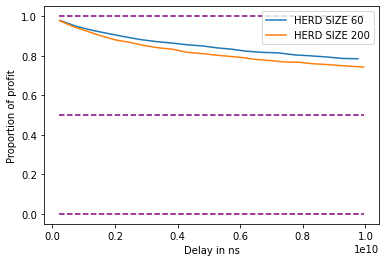

In [111]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit')
#plt.title('COMPARISON OF TRADING STATEGIES')
xmin, xmax= temp_12.DELAY['mean'].min(), temp_12.DELAY['mean'].max()
plt.hlines(y=[0, 0.5, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.plot(temp_7.DELAY['mean'], temp_7.PERCENT_ORDERS['mean'], label="HERD SIZE 60")
plt.plot(temp_12.DELAY['mean'], temp_12.PERCENT_ORDERS['mean'], label="HERD SIZE 200")
plt.legend(loc='upper right')

plt.show()

In [112]:
CONFIG = '15'
PATHS = []
for file in os.listdir(f'log/conf{CONFIG}_log_mazza_09_02_2021/log'):
    if f'herd{CONFIG}' in file:
        PATHS.append(f'log/conf{CONFIG}_log_mazza_09_02_2021/log/{file}')

df, slave_ids, master_ids = get_delays_and_profits(PATHS)
df

,DELAY,SLAVE_PROFIT,SLAVE_ORDERS,MASTER_PROFIT,MASTER_ORDERS,SIMULATION,PERCENT_ORDERS,PERCENT
0,2911124,21094.0,356,22453,359,log/conf15_log_mazza_09_02_2021/log/herd15_see...,0.991643,0.939474
1,5858511,16002.0,364,16575,373,log/conf15_log_mazza_09_02_2021/log/herd15_see...,0.975871,0.965430
2,7294109,12592.0,382,12593,375,log/conf15_log_mazza_09_02_2021/log/herd15_see...,1.018667,0.999921
3,9832746,12597.0,367,12371,360,log/conf15_log_mazza_09_02_2021/log/herd15_see...,1.019444,1.018269
4,10754242,19634.0,352,19040,354,log/conf15_log_mazza_09_02_2021/log/herd15_see...,0.994350,1.031197
...,...,...,...,...,...,...,...,...
5995,9986295033,2041.0,278,17009,373,log/conf15_log_mazza_09_02_2021/log/herd15_see...,0.745308,0.119995
5996,9987060946,2136.0,268,20759,366,log/conf15_log_mazza_09_02_2021/log/herd15_see...,0.732240,0.102895
5997,9987759567,4543.0,295,14742,344,log/conf15_log_mazza_09_02_2021/log/herd15_see...,0.857558,0.308167
5998,9989271426,4772.0,277,27511,378,log/conf15_log_mazza_09_02_2021/log/herd15_see...,0.732804,0.173458


In [113]:
df['g'] = df.index//300
temp_13 = df.groupby('g').agg(['mean', 'std'])
temp_13

DELAY                SLAVE_PROFIT               SLAVE_ORDERS  \
            mean           std          mean           std         mean   
g                                                                         
0   2.424538e+08  1.429104e+08  22439.353333  14964.332738   357.876667   
1   7.612900e+08  1.500979e+08  20154.766667  14848.729449   343.453333   
2   1.231898e+09  1.444128e+08  19099.223333  16496.245316   334.730000   
3   1.732661e+09  1.442401e+08  16828.983333  12919.785123   329.470000   
4   2.241167e+09  1.397908e+08  16577.083333  14866.640506   322.873333   
5   2.776357e+09  1.578997e+08  15360.826667  15169.342974   317.846667   
6   3.302548e+09  1.513426e+08  14705.760000  12715.238793   313.926667   
7   3.803396e+09  1.424914e+08  13150.873333  14976.149196   310.403333   
8   4.310347e+09  1.476809e+08  11655.336667  11731.542947   307.323333   
9   4.796615e+09  1.410376e+08  11892.760000  15864.407399   302.916667   
10  5.268776e+09  1.314800e+08  10899.173333  12558.599638   298.203333   
11  5.718095e+09  1.333255e+08   9033.070000   9352.184290   296.056667   
12  6.173579e+09  1.428554e+08   9083.183333  11704.804490   293.746667   
13  6.701474e+09  1.561559e+08   8340.330000  10559.059469   290.883333   
14  7.220207e+09  1.466382e+08   6356.493333   8513.867800   288.103333   
15  7.726800e+09  1.534993e+08   7450.270000  11536.297890   285.000000   
16  8.222555e+09  1.360131e+08   6843.090000  11031.275144   283.273333   
17  8.742646e+09  1.569585e+08   5657.760000   9747.422203   280.440000   
18  9.277215e+09  1.415612e+08   6140.410000  10682.387074   279.726667   
19  9.756082e+09  1.324901e+08   4064.820000   8620.151250   278.700000   

              MASTER_PROFIT               MASTER_ORDERS             \
          std          mean           std          mean        std   
g                                                                    
0   15.596119  23430.363333  14168.979546    366.056667  14.454176   
1   15.490675  22910.153333  15194.291808    364.573333  15.644609   
2   14.364711  24516.850000  17883.382066    365.083333  16.393664   
3   13.950310  22767.646667  14108.830406    363.053333  13.504755   
4   12.778691  23783.346667  16753.731903    364.413333  15.749157   
5   14.155248  23664.766667  17719.955991    365.346667  16.313602   
6   13.516049  24412.063333  14200.358714    363.606667  15.183558   
7   11.795384  23220.316667  17315.793570    365.260000  15.895112   
8   12.173995  22494.976667  13406.642161    365.206667  14.699804   
9   11.765393  24085.570000  19067.105442    365.210000  16.280338   
10  12.054586  23753.453333  14995.189530    363.993333  15.339196   
11  12.636418  22694.300000  12710.241799    364.033333  14.474250   
12  12.769470  23102.330000  15443.267917    364.433333  14.415208   
13  11.778746  22862.250000  13850.249086    365.560000  14.839602   
14  12.399670  21888.456667  12009.261977    363.943333  13.931274   
15  12.151496  24303.360000  15893.976695    364.360000  14.599345   
16  11.091831  23932.906667  15535.544593    364.850000  15.357746   
17  11.547187  23295.583333  13369.068955    364.096667  15.240787   
18  11.186409  24573.173333  16577.019124    365.423333  16.127962   
19  11.566732  23010.533333  14021.723794    365.296667  14.570162   

   PERCENT_ORDERS             PERCENT            
             mean       std      mean       std  
g                                                
0        0.977984  0.031282  0.957982  0.246881  
1        0.942652  0.035720  0.891297  0.293238  
2        0.917900  0.042302  0.785970  0.307454  
3        0.908146  0.039018  0.738126  0.313351  
4        0.887030  0.040151  0.693128  0.306248  
5        0.870813  0.038211  0.648729  0.297993  
6        0.864105  0.037175  0.597366  0.321990  
7        0.850790  0.036931  0.549891  0.289972  
8        0.842283  0.035946  0.501262  0.307340  
9        0.830564  0.039781  0.453229  0.289073  
10       0.820215  0.039

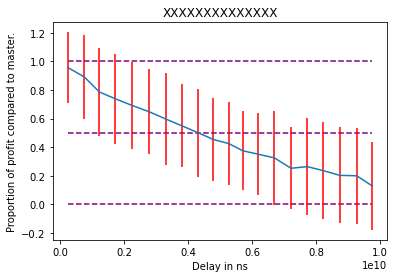

In [114]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit compared to master.')
plt.title('XXXXXXXXXXXXXX')
xmin, xmax= temp_13.DELAY['mean'].min(), temp_13.DELAY['mean'].max()
plt.hlines(y=[0.0, 0.5, 1.0], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.errorbar(temp_13.DELAY['mean'], temp_13.PERCENT['mean'], yerr=temp_13.PERCENT['std'], ecolor='red')  
plt.show()

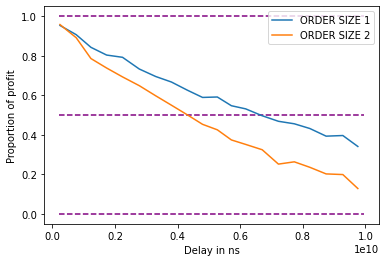

In [115]:
plt.xlabel('Delay in ns')
plt.ylabel('Proportion of profit')
#plt.title('COMPARISON OF TRADING STATEGIES')
xmin, xmax= temp_12.DELAY['mean'].min(), temp_12.DELAY['mean'].max()
plt.hlines(y=[0, 0.5, 1], xmin=[xmin, xmin, xmin], xmax=[xmax, xmax, xmax], colors='purple', linestyles='dashed')
plt.plot(temp_7.DELAY['mean'], temp_7.PERCENT['mean'], label="ORDER SIZE 1")
plt.plot(temp_13.DELAY['mean'], temp_13.PERCENT['mean'], label="ORDER SIZE 2")
plt.legend(loc='upper right')

plt.show()